### Evaluation Project 7

---------------------------

# Customer Churn Analysis


### Submitted by : Shahla M


### Problem Statement:



Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.
Note: You can find the dataset in the link below.

Downlaod Files: https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score,classification_report, confusion_matrix, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

### Importing the DATASET

In [3]:
churn=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")


In [3]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Checking Top 5 rows Data

In [3]:


churn.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EDA


### Checking Total Numbers of Rows and Column

In [4]:


churn.shape



(7043, 21)

### Checking All Column Names

### 

In [5]:


churn.columns



Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Checking Data Type of All Data

In [6]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Checking for Null Values

In [7]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



We can see Null Value is not present in any column

### Checking for Null Values through heatmap also### 

<AxesSubplot:>

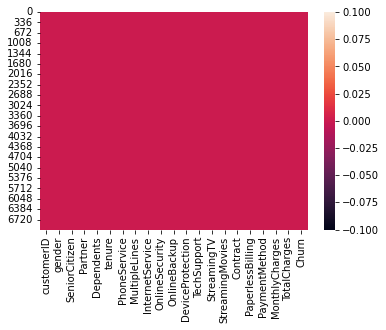

In [8]:
sns.heatmap(churn.isnull())

 

We can see here also that there is no Null Values present in our dataset.

### Information about Data (Memory Used and Data Types)

In [9]:


churn.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Checking for 0 values if present in our dataset or not

In [10]:
(churn==' ?').sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#####  We can see there are no 0 values present in our dataset


### Checking whether the dataset contains any space

In [11]:


churn[churn['Churn'] == '']



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


##### So we can see there are no spaces present in the dataset.


### Checking for blank value in our Target Column

In [12]:
churn[churn['Churn'] == ''].index

Int64Index([], dtype='int64')

##### So, we can check there are no blank value present in our Target Column


### Checking values of Target Variable.

In [13]:


churn['Churn'].value_counts()



No     5174
Yes    1869
Name: Churn, dtype: int64

### Checking unique values present in the Target Variable.

In [14]:
churn['Churn'].unique()

array(['No', 'Yes'], dtype=object)

### Checking unique elements of each columns

In [15]:
churn['Churn'].nunique()

2

In [16]:


churn.nunique()



customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Descriptive Statistics

In [17]:
# Description of Dataset : works only on continuous column 
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Observations:

  -  So, we can see that 3 column is containing continuous data and rest 18 column contains categorical data.

### Checking Description through heatmap also.

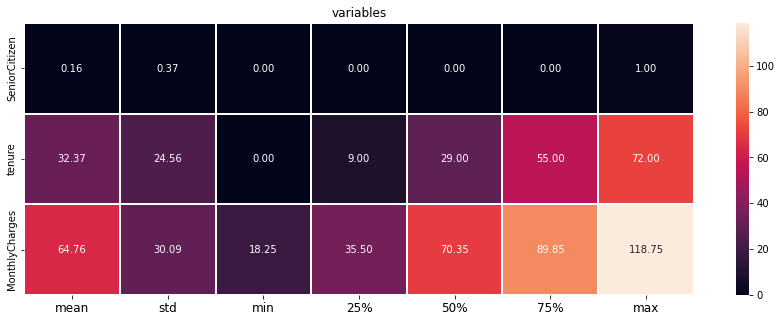

In [18]:
plt.figure(figsize=(15,5))
sns.heatmap(round(churn.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

### Observations :

  -  The summary of this dataset looks good as there are no negative value present.
  -  3 Continuous columns are: 'SeniorCitizen', 'tenure', 'MonthlyCharges'
  -  18 Categorical columns are: 'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'TotalCharges', 'Churn'
  -  We can see 'TotalCharges' column data are float type but it's datatype is object. So, we will convert it to Float Datatype.
  -   We can see the counts of Continuous columns are 7043.000000 which means no null values are present.
  -  Total No of Rows: 7043 and Total No. of Columns: 21.
  -  We can see 'SeniorCitizen' have only max value which is "1" but 25%, 50%, 75% and Minimum Value is "0". So we need to check this column.
  -  We are determining Mean, Standard Deviation, Minimum and Maximum Values of each column.

  1.  SeniorCitizen:

  -  Mean= 0.162147,
  -  Std= 0.368612,
  -  Min= 0.000000,
  -  Max= 1.000000

  2.  tenure:

  -  Mean= 32.371149,
  -  Std= 24.559481,
  -  Min= 0.000000,
  -  Max= 72.000000

  3.  MonthlyCharges:

  -  Mean= 64.761692,
  -  Std= 30.090047,
  -  Min= 18.250000,
  -  Max= 118.750000


### Data Cleaning and preprocessing

Since there are no Null values in the dataset, so we need to treat them.


In [19]:
churn['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [20]:
churn['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [21]:
churn["SeniorCitizen"]= churn["SeniorCitizen"].map({0: "No", 1: "Yes"})


In [22]:


churn['SeniorCitizen'].unique()



array(['No', 'Yes'], dtype=object)

### Converting Data Type of column "TotalCharges" as this column contains numeric values but datatype is showing object

In [23]:
churn['TotalCharges']=pd.to_numeric(churn['TotalCharges'],errors='coerce')

churn.dtypes




customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [24]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



After converting Datatype of column "TotalCharges", we can see there are 11 null values present in column "TotalCharges"


In [25]:
#Filling Null Values of "TotalCharges" column in dataset by mean value
churn["TotalCharges"].fillna(churn["TotalCharges"].mean(), inplace=True)



In [26]:


churn[churn['tenure'] == 0].index



Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [27]:
#Droping/Deleting the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

churn.drop(labels=churn[churn['tenure'] == 0].index, axis=0, inplace=True)
churn[churn['tenure'] == 0].index

Int64Index([], dtype='int64')

### Checking Null value again

In [28]:


churn.isnull().sum()



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Dropping column 'customerID' as it have no realtion with our Target column 'Churn'

In [29]:
#Droping column 'customerID' as it have no relation with our Target column
churn=churn.drop(columns="customerID", axis=1)

### Checking again top 5 rows after droping column

In [30]:


churn.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Visualization

#### Univariate Analysis
#### Using Countplot for categorical columns

Male      3555
Female    3488
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

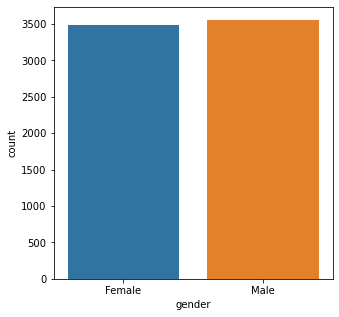

In [4]:
#Count Plot for "gender" column
print(churn["gender"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("gender",data=churn)

### Observation :



 -    We can see Male (Total No= 3549) are more compare to Female (Total No= 3483).



0    5901
1    1142
Name: SeniorCitizen, dtype: int64


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

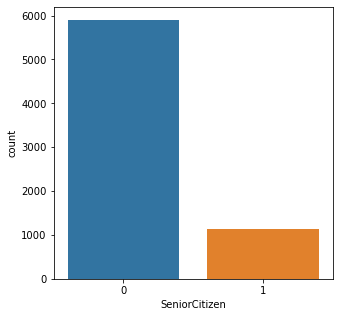

In [5]:
#Count Plot for "SeniorCitizen" column
print(churn["SeniorCitizen"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("SeniorCitizen",data=churn)

### Observation :

- We can see SeniorCitizen are less (Total No= 1142) and not SeniorCitizen are more (Total No= 5890).

No     3641
Yes    3402
Name: Partner, dtype: int64


<AxesSubplot:xlabel='Partner', ylabel='count'>

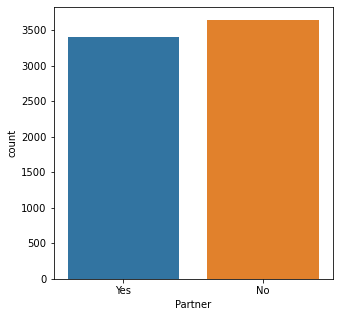

In [6]:
#Count Plot for "Partner" column
print(churn["Partner"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("Partner",data=churn)

### Observation :
- We can see Partner are less (Total No= 3393) and not having Partner are more (Total No= 3639).

No     4933
Yes    2110
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

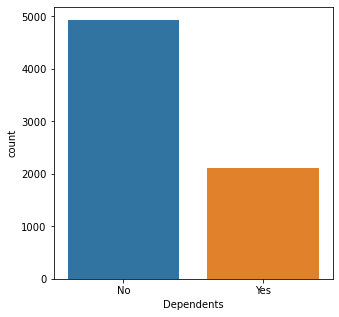

In [7]:
#Count Plot for "Dependents" column
print(churn["Dependents"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("Dependents",data=churn)

### Observation :

- We can see Dependents are less (Total No= 2099) and not having Dependents are more (Total No= 4933).

Yes    6361
No      682
Name: PhoneService, dtype: int64


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

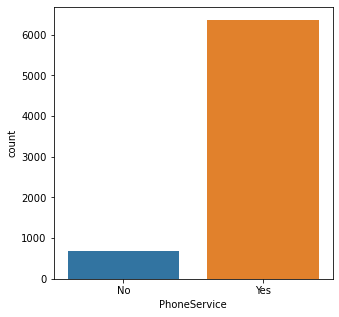

In [8]:
#Count Plot for "PhoneService" column
print(churn["PhoneService"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("PhoneService",data=churn)

### Observation :
- We can see having PhoneService are more (Total No= 6352) and not having PhoneService are less (Total No= 680)

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

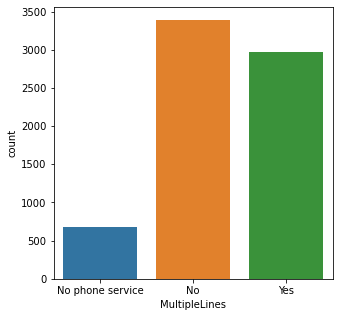

In [9]:
#Count Plot for "MultipleLines" column
print(churn["MultipleLines"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("MultipleLines",data=churn)

### Observation :



  -  We can see not having "MultipleLines" is more (Total No= 3385) compare to having "MultipleLines" (Total No= 2967).
  -  Having "No phone service" is least (Total No= 680)




No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

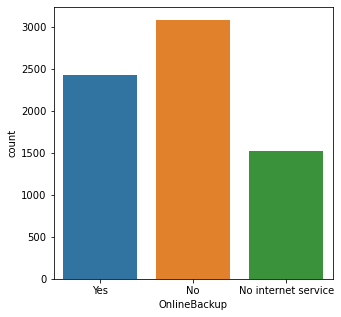

In [38]:
#Count Plot for "OnlineBackup" column
print(churn["OnlineBackup"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("OnlineBackup",data=churn)

### Observations :




 -   We can see not having "OnlineBackup" is more (Total No= 3087) compare to having "OnlineBackup" (Total No= 2425).
 -   Having "No internet service" is least (Total No= 1520)



No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

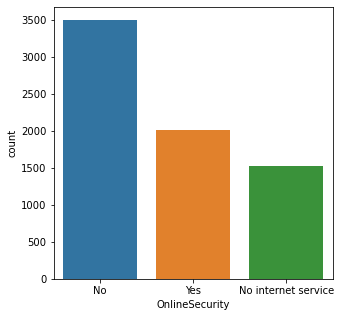

In [37]:
#Count Plot for "OnlineSecurity" column
print(churn["OnlineSecurity"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("OnlineSecurity",data=churn)

### Observations :


  -  We can see not having "OnlineSecurity" is more (Total No= 3497) compare to having "OnlineSecurity" (Total No= 2015).
  -  Having "No internet service" is least (Total No= 1520)



No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

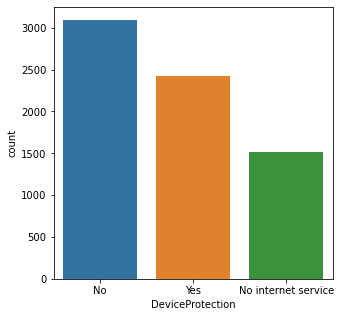

In [39]:
#Count Plot for "DeviceProtection" column
print(churn["DeviceProtection"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("DeviceProtection",data=churn)

### Observations :



  -  We can see not having "DeviceProtection" is more (Total No= 3094) compare to having "DeviceProtection" (Total No= 24).18
  -  Having "No internet service" is least (Total No= 1520)



No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

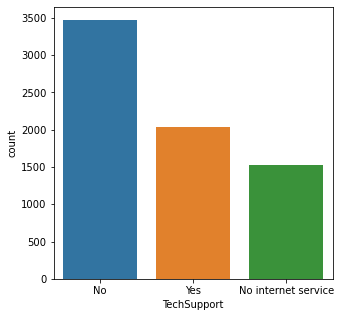

In [40]:
#Count Plot for "TechSupport" column
print(churn["TechSupport"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("TechSupport",data=churn)

### Observations :



  -  We can see not having "TechSupport" are more (Total No= 3472) compare to having "TechSupport" (Total No= 2040).
  -  Having "No internet service" is least (Total No= 1520)



No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

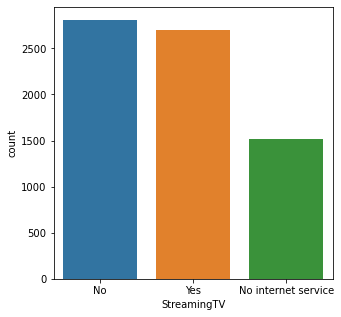

In [41]:
#Count Plot for "StreamingTV" column
print(churn["StreamingTV"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("StreamingTV",data=churn)

### Observations :




  -  We can see not "StreamingTV" are more (Total No= 2810) compare to "StreamingTV" (Total No= 2707).
  -  Having "No internet service" is least (Total No= 1526)



No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

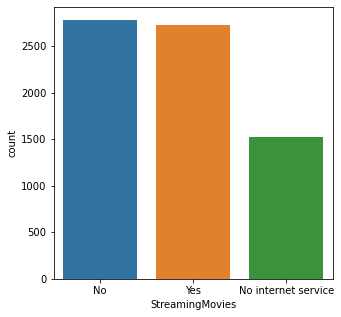

In [42]:
#Count Plot for "StreamingMovies" column
print(churn["StreamingMovies"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("StreamingMovies",data=churn)

### Observations :



    We can see not "StreamingMovies" are more (Total No= 2781) compare to "StreamingMovies" (Total No= 2731).
    Having "No internet service" is least (Total No= 1520)



Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

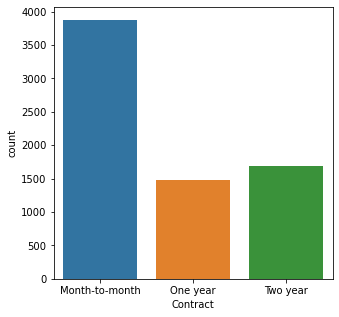

In [43]:
#Count Plot for "Contract" column
print(churn["Contract"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("Contract",data=churn)

### Observations :



 -   We can see "Contract" done with customers for Month-to-month is more (Total No= 3875) and done for One year is less (Total No= 1473)




Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

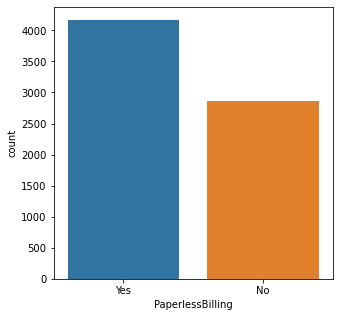

In [44]:
#Count Plot for "PaperlessBilling" column
print(churn["PaperlessBilling"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("PaperlessBilling",data=churn)

### Observations :


 - We can see PaperlessBilling are done more (Total No= 4171) compare to not done PaperlessBilling (Total No= 2872).

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

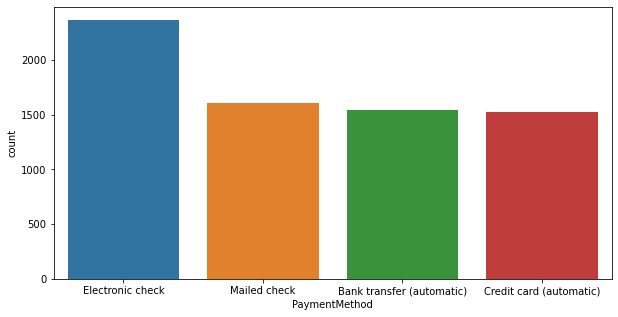

In [45]:
#Count Plot for "PaymentMethod" column
print(churn["PaymentMethod"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot("PaymentMethod",data=churn)

### Observations :



 -   We can see PaymentMethod "Electronic check" is used more (Total No= 2365) and "Credit card (automatic)" is used less (Total No= 1522).
 -   "Mailed check" (Total No= 1612) and "Bank transfer (automatic)" (Total No= 1544) is also used as PayemntMethod but less than "Electronic check" and more than "Credit card"




No     5163
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

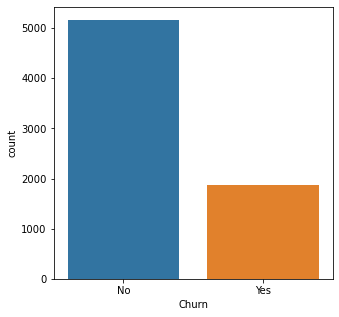

In [46]:
#Count Plot for "Churn" column
print(churn["Churn"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("Churn",data=churn)

### Observations :

 - We can see Churn are less (Total No= 1869) and not having Churn are more (Total No= 51).63 It shows 1869 number of customers no longer want to purchase goods and services from the business.

## Using Histplot for continuous columns

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64


<AxesSubplot:xlabel='tenure', ylabel='Count'>

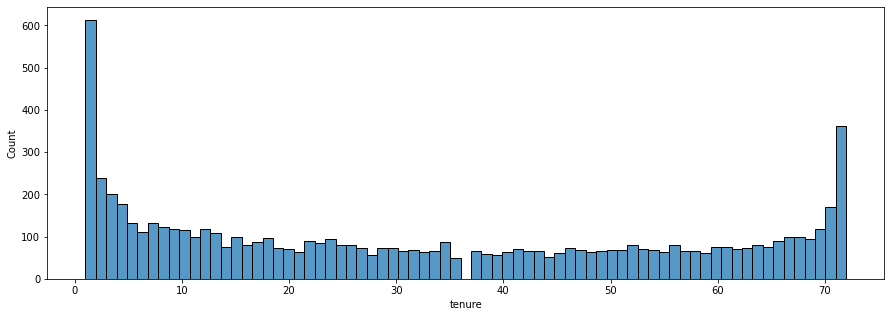

In [47]:
#Histplot for "tenure" column
print(churn["tenure"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='tenure',data=churn,bins=73)

### Observations :

- We can see having tenure 1 is highest (Total No= 613)

20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1584, dtype: int64


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

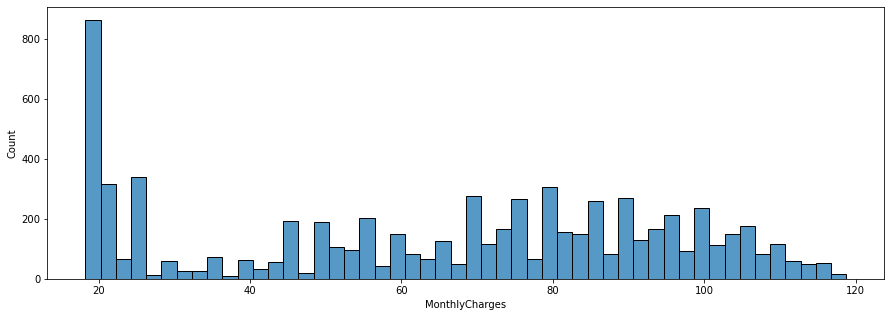

In [48]:
#Histplot for "MonthlyCharges" column
print(churn["MonthlyCharges"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='MonthlyCharges',data=churn,bins=50)

### Observations :

 - We can see having MonthlyCharges 20.05 is highest (Total No= 61)

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

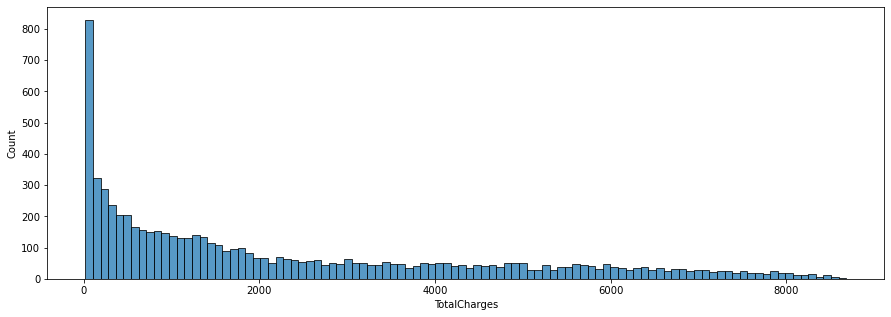

In [49]:
#Histplot for "TotalCharges" column
print(churn["TotalCharges"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='TotalCharges',data=churn,bins=100)



### Observations :


- We can see having TotalCharges 20.20 is highest (Total No= 11)

<AxesSubplot:xlabel='gender', ylabel='count'>

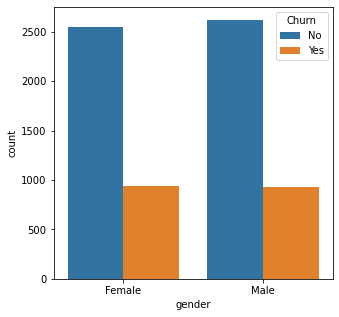

In [50]:
#Count Plot for comparision between "gender" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("gender",data=churn, hue='Churn')

### Observations :

- Male customer are few more compare to female and small difference in churn rate is of Male and Female. So, through Gender we cannot determine churn rate and we can say that it is not good measure for churn rate.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

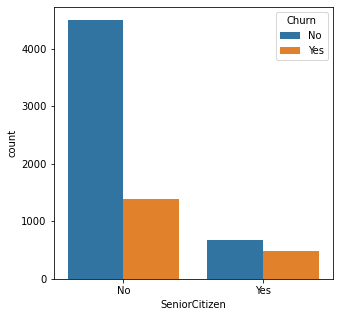

In [51]:
#Count Plot for comparision between "SeniorCitizen" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("SeniorCitizen",data=churn, hue='Churn')

### Observations :

 - In SeniorCitizen also there is small differnce to determine churn rate but those who are young and not SeniorCitizen are determining churn rate as there is differnce in churn and not churn.

<AxesSubplot:xlabel='Partner', ylabel='count'>

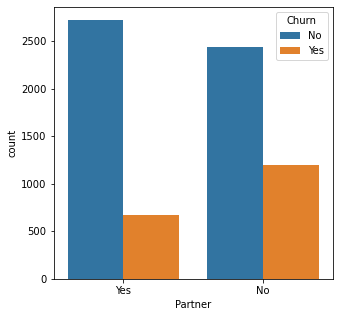

In [52]:
#Count Plot for comparision between "Partner" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("Partner",data=churn, hue='Churn')

### Observations :



- Those customer who have Partner are having less churn compare to those having Partner.


<AxesSubplot:xlabel='Dependents', ylabel='count'>

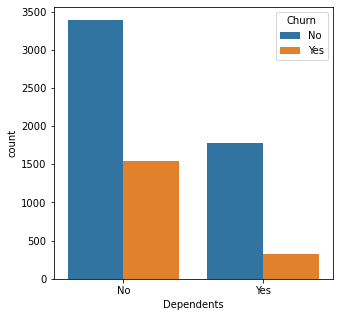

In [53]:
#Count Plot for comparision between "Dependents" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("Dependents",data=churn, hue='Churn')

### Observations :



- Those customer who have Dependents are having less churn but those customers who have no Dependents are having more churn.


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

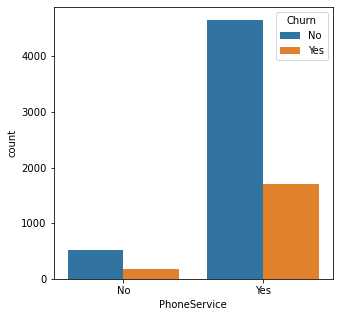

In [54]:
#Count Plot for comparision between "PhoneService" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("PhoneService",data=churn, hue='Churn')

### Observations :


- Those customer who have PhoneService are having less churn but more than those who have No PhoneService.



<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

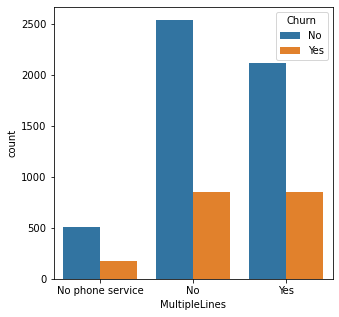

In [55]:
#Count Plot for comparision between "MultipleLines" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("MultipleLines",data=churn, hue='Churn')

### Observations :



- MultipleLines having No Phone Service having less churn and those having or not having MultipleLines have equal churn rate.


<AxesSubplot:xlabel='InternetService', ylabel='count'>

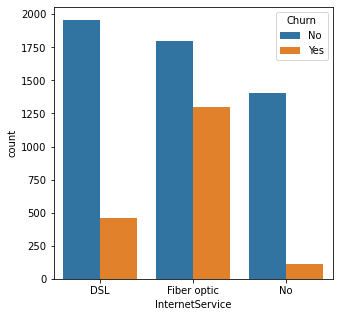

In [56]:
#Count Plot for comparision between "InternetService" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("InternetService",data=churn, hue='Churn')

### Observations :
- No InternetService having less churn and those having Fiber Optic InternetService are having more churn.


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

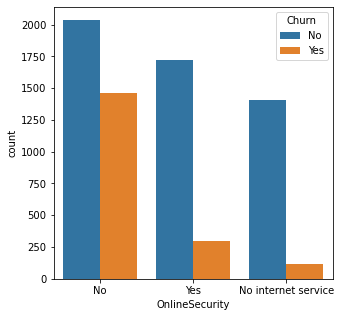

In [57]:
#Count Plot for comparision between "OnlineSecurity" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("OnlineSecurity",data=churn, hue='Churn')

### Observations :



- OnlineSecurity having No InternetService are having less churn and not having OnlineSecurity are having more churn.


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

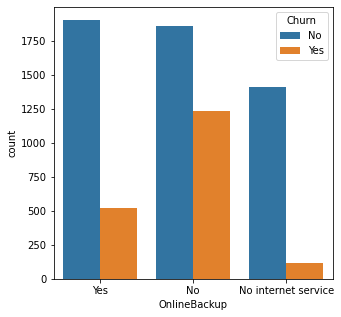

In [58]:
#Count Plot for comparision between "OnlineBackup" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("OnlineBackup",data=churn, hue='Churn')

### Observations :


- OnlineBackup having No InternetService are having less churn and not having OnlineBackup are having more churn.



<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

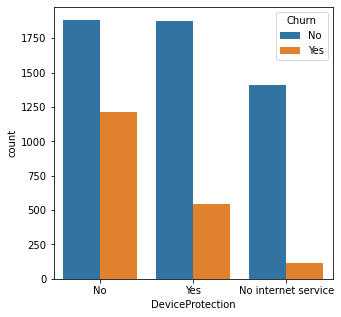

In [59]:
#Count Plot for comparision between "DeviceProtection" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("DeviceProtection",data=churn, hue='Churn')

### Observations :
- DeviceProtection having No InternetService are having less churn and not having DeviceProtection are having more churn.


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

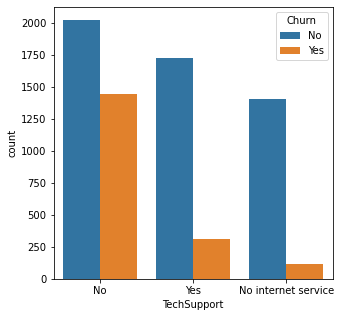

In [60]:
#Count Plot for comparision between "TechSupport" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("TechSupport",data=churn, hue='Churn')

### Observations :



- TechSupport having No InternetService are having less churn and not having TechSupport are having more churn.


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

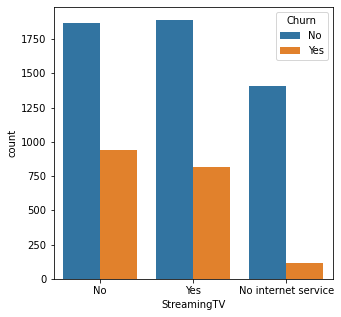

In [61]:
#Count Plot for comparision between "StreamingTV" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("StreamingTV",data=churn, hue='Churn')

### Observations :



- StreamingTV having No InternetService are having less churn and not having StreamingTV are having more churn.


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

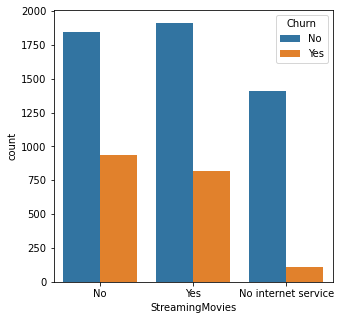

In [62]:
#Count Plot for comparision between "StreamingMovies" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("StreamingMovies",data=churn, hue='Churn')



### Observations :


- StreamingMovies having No InternetService are having less churn and not having StreamingMovies are having more churn

<AxesSubplot:xlabel='Contract', ylabel='count'>

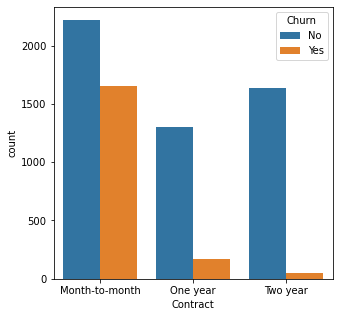

In [63]:
#Count Plot for comparision between "Contract" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("Contract",data=churn, hue='Churn')



### Observations :


- Contract having Month-tomonth are having more churn and for Two year are having less churn.



<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

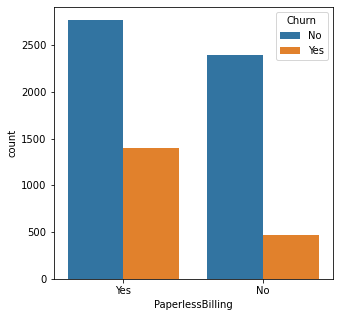

In [64]:
#Count Plot for comparision between "PaperlessBilling" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("PaperlessBilling",data=churn, hue='Churn')

### Observations :


- Having PaperlessBilling are having more churn and not having PaperlessBilling are having less churn.



<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

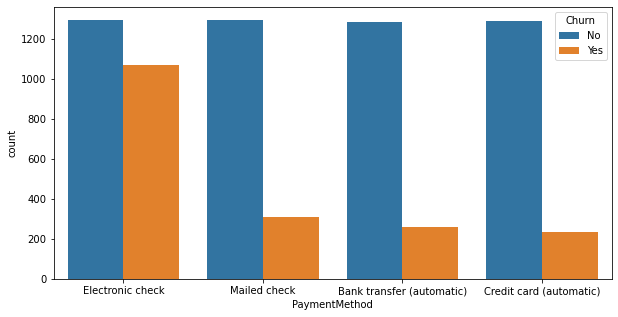

In [65]:
#Count Plot for comparision between "PaymentMethod" column and "Churn" column
plt.figure(figsize=(10,5))
sns.countplot("PaymentMethod",data=churn, hue='Churn')

### Observations :



- PaymentMethod used Electronic check having more churn compare to other PaymentMethod. 
- Credit card PaymentMethod have less churn compare to other PaymentMethod.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

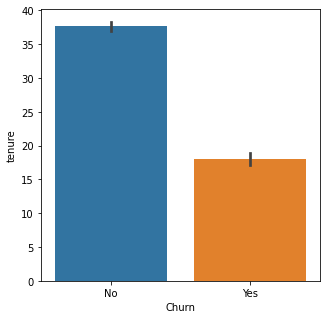

In [66]:
#Bar Plot for comparision between "tenure" column and "Churn" column
plt.figure(figsize=(5,5))
sns.barplot(y="tenure",data=churn, x='Churn')

### Observations :


- We can see less churn with high tenure. If tenure is less then churn rate is also High.



<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

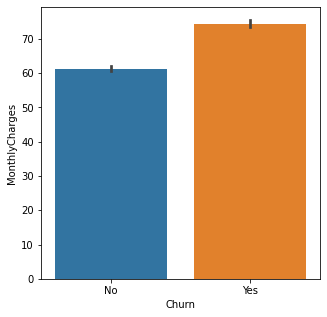

In [67]:
#barplot for comparision between "MonthlyCharges" column and "Churn" column
plt.figure(figsize=(5,5))
sns.barplot(y="MonthlyCharges",data=churn, x='Churn')

### Observations :



- We can see High churn with High MonthlyCharges. Less Churn with less MonthlyCharges.


<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

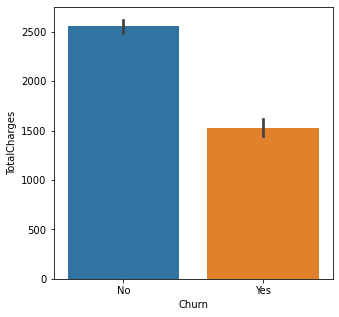

In [68]:
#barplot for comparision between "TotalCharges" column and "Churn" column
plt.figure(figsize=(5,5))
sns.barplot(y="TotalCharges",data=churn, x='Churn')

### Obs

Less TotalCharges, high churn rate. High TotalCharges less churn rate.



## Multivariate Analysis


### Using Pairplot :



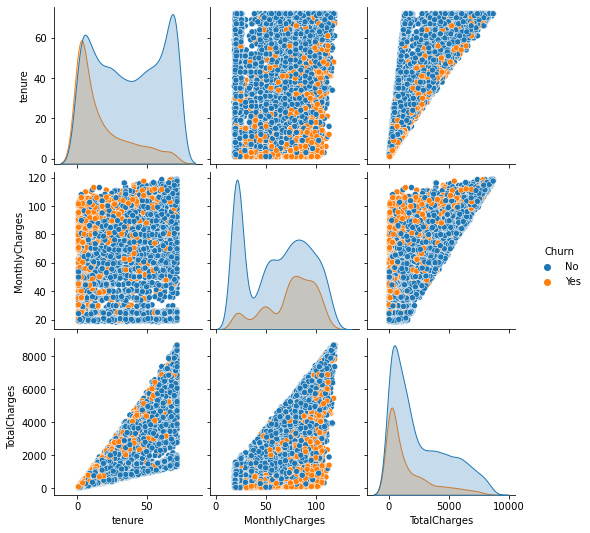

In [69]:


sns.pairplot(churn,hue="Churn")



### Observations :


- We can observe relationship between all the continuous column and the target column by this pairplot in pairs which are plotted on basis of target column.


### Label Encoding

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
enc = LabelEncoder()
for i in churn.columns:
    if churn[i].dtypes=="object":
        churn[i]=enc.fit_transform(churn[i].values.reshape(-1,1))

In [83]:


churn.dtypes



gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object


### Checking dataset after transformation

In [84]:


churn.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Checking Correlation

In [85]:


churn.corr()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


### Observations 
- This gives the correlation between the denpendent and independent variables.

<AxesSubplot:>

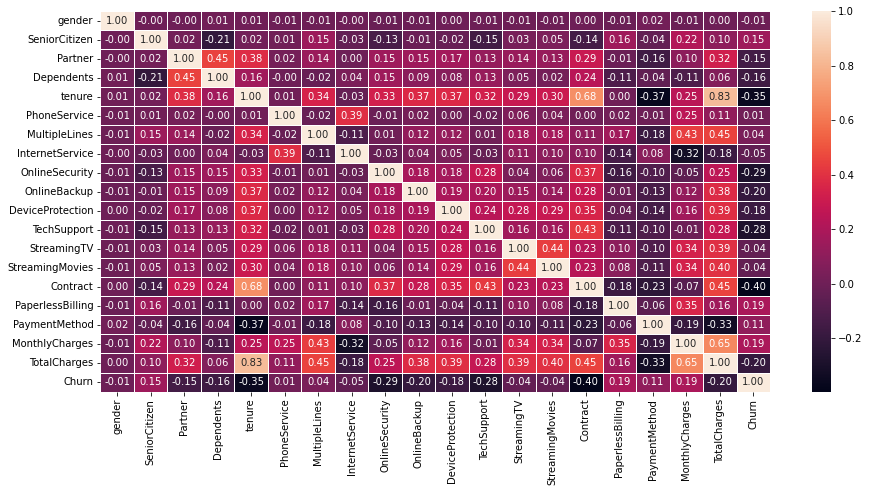

In [86]:
plt.figure(figsize=(15,7))
sns.heatmap(churn.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')


### Observations 


 -   gender has -1 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -   SeniorCitizen has 15 percent correlation with the target column which can be considered as good correlation and positively correlated.

 -   Partner has -15 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -  Dependents has -16 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -   Tenure has -35 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -   PhoneService has 1 percent correlation with the target column which can be considered as good correlation and positively correlated.

 -   MultipleLines has 4 percent correlation with the target column which can be considered as good correlation and positively correlated.

 -  InternetService has -5 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -   OnlineSecurity has -29 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -   OnlineBackup has -20 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -   DeviceProtection has -18 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -   TechSupport has -28 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -   StreamingTV has -4 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -    StreamingMovies has -4 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -   Contract has -40 percent correlation with the target column which can be considered as weak correlation and negatively correlated.

 -   PaperlessBilling has 19 percent correlation with the target column which can be considered as good correlation and positively correlated.

 -   PaymentMethod has 11 percent correlation with the target column which can be considered as good correlation and positively correlated.

 -   MonthlyCharges has 19 percent correlation with the target column which can be considered as strong correlation and positively correlated.

 -   TotalCharges has -20 percent correlation with the target column which can be considered as good correlation and negatively correlated.

 -   Max correlation is with MonthlyCharges

 -   Min correlation is with Contract


## Checking correlation with barplot

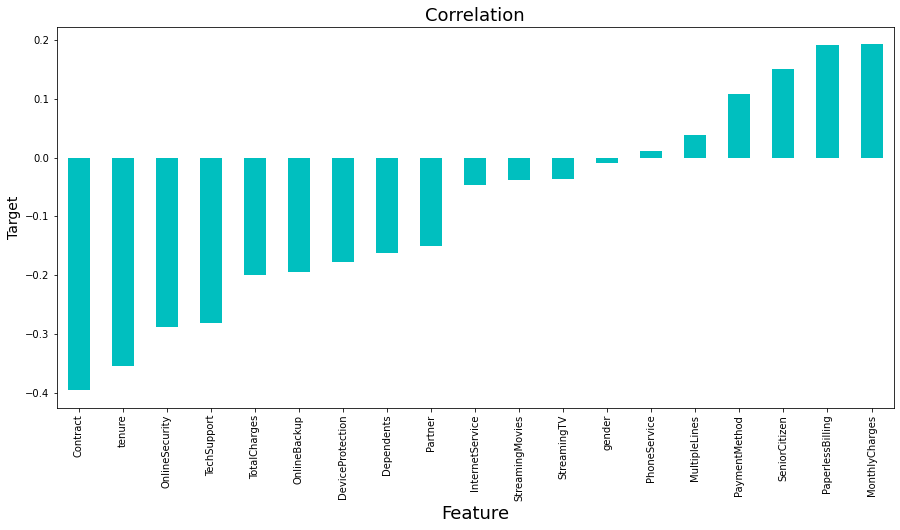

In [87]:
plt.figure(figsize=(15,7))
churn.corr()['Churn'].sort_values(ascending=True).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

### Observations 



- MonthlyCharges the highest positive correlation with Target column 'Churn' and Contract have the highest negative correlation with Target column 'Churn'.

## Checking Outliers

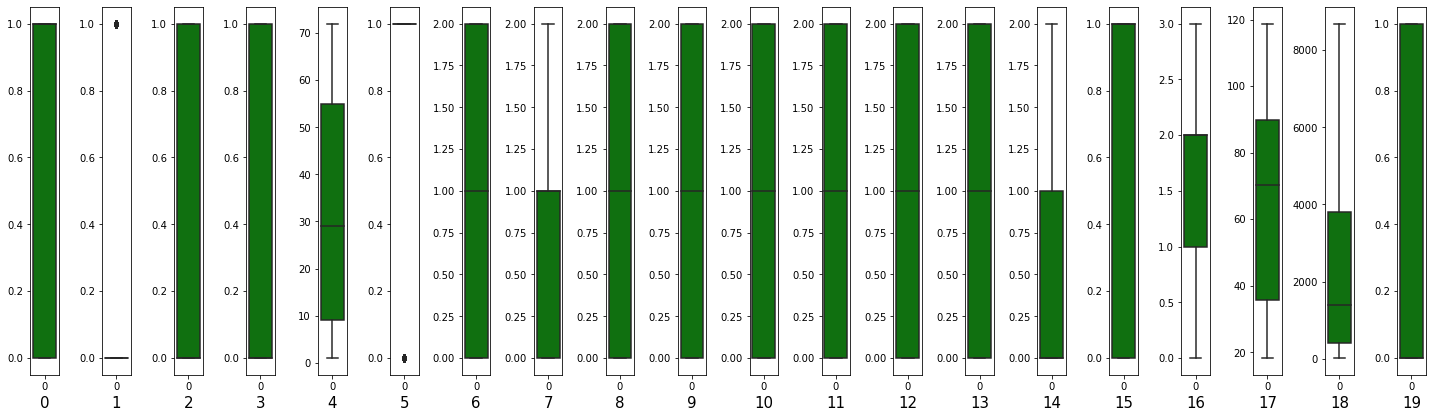

In [88]:
collist=churn.columns.values
ncol=21
nrows=11
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(collist)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=churn[collist[column]],color='green',orient='v')
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

In [89]:


churn.columns



Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Observations :


- We can see Outliers are present only in 2 columns: "SeniorCitizen" and "PhoneService". But both column are categorical, so we will not remove outliers.

## Checking for the skewness


In [90]:


churn.skew()



gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

### Observations :
  -  Skewness threshold taken is +/-0.25
  -  All the columns are not normallly distributed, they are skewed.
    Columns which are having skewness: SeniorCitizen, Dependents, PhoneService, OnlineSecurity, TechSupport, Contract, PaperlessBilling and TotalCharges.
  - Since SeniorCitizen, Dependents, PhoneService, OnlineSecurity, TechSupport, Contract and PaperlessBilling are categorical column so we will not remove skewness from them.
  -  Only we will remove skewness from TotalCharges as this column contains continuous data.

## Checking skweness through Data Visualization

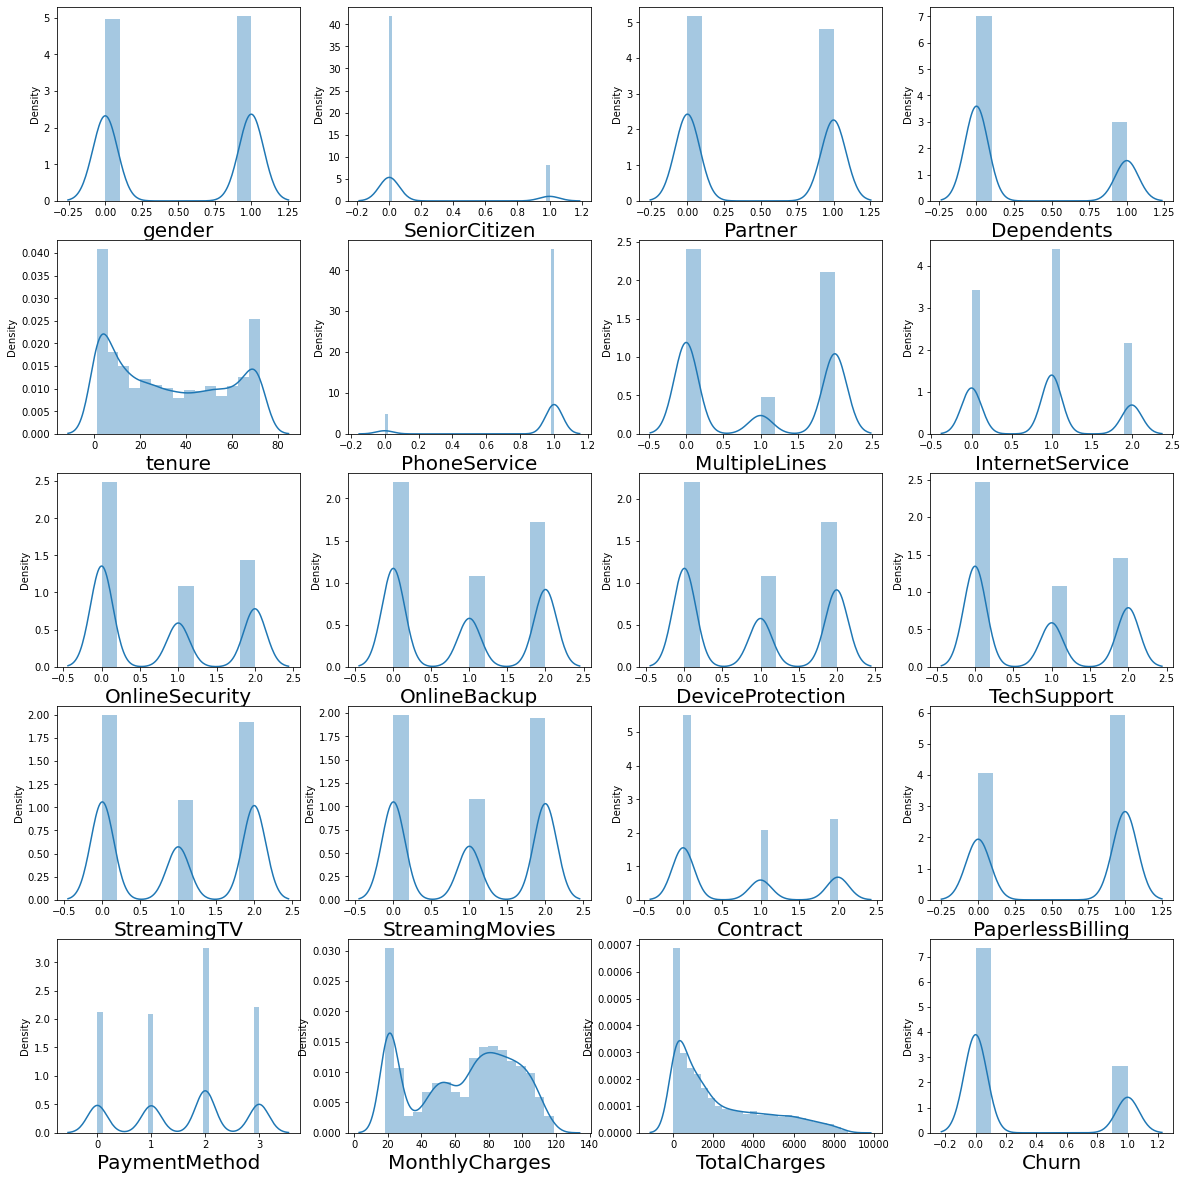

In [96]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in churn:
    if plotnumber<=21:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(churn[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see skewed data.


## Removing skewness using yeo-johnson method

In [97]:
from sklearn.preprocessing import PowerTransformer

In [98]:
collist=['TotalCharges']
churn[collist]=power_transform(churn[collist],method='yeo-johnson')
churn[collist]

,TotalCharges
0,-1.810069
1,0.254257
2,-1.386091
3,0.233220
4,-1.248808
...,...
7038,0.296583
7039,1.565846
7040,-0.858393
7041,-0.921477


## Checking skewness after removal

In [99]:
churn.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges       -0.144643
Churn               1.060622
dtype: float64

### Checking skewness after removal through data visualization using distplot

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

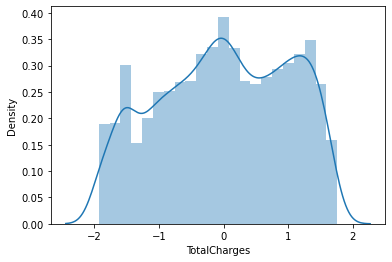

In [100]:


sns.distplot(churn['TotalCharges'])



### Observations :

The data is not normal but the skewness has got removed compared to the old data.

## Data preprocessing


### Spliting data into Target and Features



In [101]:
x=churn.drop("Churn",axis=1)
y=churn["Churn"]

In [102]:


x.columns



Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [103]:


x.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-1.810069
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.254257
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.386091
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0.233220
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.248808


In [104]:


y.head()



0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [105]:


x.shape, y.shape



((7032, 19), (7032,))

In [106]:


y.value_counts()



0    5163
1    1869
Name: Churn, dtype: int64

### Observations :
The data is not balanced. So, we will use oversampling method to balance it.


## Oversampling using the SMOTE


In [107]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [108]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)
y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

### Scaling data using Standard Scaler

In [110]:


scaler = StandardScaler()



In [111]:


x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)



In [112]:


x.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.891916,-0.412414,1.269462,-0.528729,-1.113521,-3.010702,0.053467,-1.264963,-0.757727,1.410296,-0.897508,-0.763363,-1.058277,-1.058471,-0.640432,0.808383,0.421972,-1.315845,-1.660141
1,1.121182,-0.412414,-0.787736,-0.528729,0.262587,0.332148,-1.010312,-1.264963,1.694644,-0.892292,1.397321,-0.763363,-1.058277,-1.058471,0.671431,-1.237038,1.423648,-0.377492,0.374436
2,1.121182,-0.412414,-0.787736,-0.528729,-1.071821,0.332148,-1.010312,-1.264963,1.694644,1.410296,-0.897508,-0.763363,-1.058277,-1.058471,-0.640432,0.808383,1.423648,-0.484831,-1.242273
3,1.121182,-0.412414,-0.787736,-0.528729,0.721290,-3.010702,0.053467,-1.264963,1.694644,-0.892292,1.397321,1.675902,-1.058277,-1.058471,0.671431,-1.237038,-1.581378,-0.884757,0.353703
4,-0.891916,-0.412414,-0.787736,-0.528729,-1.071821,0.332148,-1.010312,0.214648,-0.757727,-0.892292,-0.897508,-0.763363,-1.058277,-1.058471,-0.640432,0.808383,0.421972,0.098610,-1.106969


In [113]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.891916,-0.412414,1.269462,-0.528729,-1.113521,-3.010702,0.053467,-1.264963,-0.757727,1.410296,-0.897508,-0.763363,-1.058277,-1.058471,-0.640432,0.808383,0.421972,-1.315845,-1.660141
1,1.121182,-0.412414,-0.787736,-0.528729,0.262587,0.332148,-1.010312,-1.264963,1.694644,-0.892292,1.397321,-0.763363,-1.058277,-1.058471,0.671431,-1.237038,1.423648,-0.377492,0.374436
2,1.121182,-0.412414,-0.787736,-0.528729,-1.071821,0.332148,-1.010312,-1.264963,1.694644,1.410296,-0.897508,-0.763363,-1.058277,-1.058471,-0.640432,0.808383,1.423648,-0.484831,-1.242273
3,1.121182,-0.412414,-0.787736,-0.528729,0.721290,-3.010702,0.053467,-1.264963,1.694644,-0.892292,1.397321,1.675902,-1.058277,-1.058471,0.671431,-1.237038,-1.581378,-0.884757,0.353703
4,-0.891916,-0.412414,-0.787736,-0.528729,-1.071821,0.332148,-1.010312,0.214648,-0.757727,-0.892292,-0.897508,-0.763363,-1.058277,-1.058471,-0.640432,0.808383,0.421972,0.098610,-1.106969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,-0.891916,-0.412414,-0.787736,-0.528729,-1.113521,-3.010702,0.053467,-1.264963,-0.757727,-0.892292,-0.897508,-0.763363,-1.058277,-1.058471,-0.640432,0.808383,1.423648,-1.493621,-1.649828
10322,-0.891916,-0.412414,-0.787736,-0.528729,-1.030121,-3.010702,0.053467,-1.264963,0.468459,-0.892292,-0.897508,-0.763363,-1.058277,-1.058471,-0.640432,-1.237038,-0.579703,-1.321652,-1.269659
10323,-0.891916,2.424750,-0.787736,-0.528729,0.637890,0.332148,0.053467,0.214648,-0.757727,1.410296,0.249907,1.675902,1.159658,1.155826,-0.640432,0.808383,-1.581378,1.475758,1.185750
10324,-0.891916,2.424750,-0.787736,-0.528729,-1.071821,0.332148,-1.010312,0.214648,-0.757727,-0.892292,-0.897508,-0.763363,-1.058277,-1.058471,-0.640432,-1.237038,0.421972,0.099804,-1.103644


## Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.


In [114]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [115]:


var_threshold.get_support()



array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [116]:
x.columns[var_threshold.get_support()]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [117]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


### Observations :

- So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will check through SelectKBest method.

### SelectKBest method


In [118]:


from sklearn.feature_selection import  SelectKBest, f_classif



In [119]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [120]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

             Feature        Score
14          Contract  3893.241111
4             tenure  2145.408689
8     OnlineSecurity  1890.449275
11       TechSupport  1811.372468
3         Dependents  1038.589974
2            Partner  1003.513835
9       OnlineBackup   809.891086
18      TotalCharges   775.229638
10  DeviceProtection   674.744891
17    MonthlyCharges   558.879687
15  PaperlessBilling   207.727037
0             gender   175.411289


### Observations :


Selecting the best features based on above scores, we can see that the column "gender" has most lowest features for the prediction, so we will drop this column.



In [121]:


x = x.drop([ "gender"],axis=1)



In [122]:


x.columns



Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

### Observations :


Now, we have completed features selection process through using 2 techniques. So, will check for multicolinearity now.

## Checking for Multicollinearity using Variance Inflation Factor


### VIF (Variance Inflation factor)


In [123]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.096229,SeniorCitizen
1,1.534895,Partner
2,1.431463,Dependents
3,11.908024,tenure
4,1.746379,PhoneService
5,1.413832,MultipleLines
6,1.765931,InternetService
7,1.348203,OnlineSecurity
8,1.236171,OnlineBackup
9,1.314740,DeviceProtection


### Observations :



The VIF value is more than 10 in the columns 'tenure' and 'TotalCharges'. But column 'TotalCharges' is having highest VIF value. So, we will drop column 'TotalCharges'.


In [124]:


x.drop('TotalCharges', axis =1, inplace=True)



In [125]:


x.columns



Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype='object')

### Checking again Multicolinearity using VIF

In [126]:


vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif



,VIF values,Features
0,1.096160,SeniorCitizen
1,1.533631,Partner
2,1.428811,Dependents
3,2.802302,tenure
4,1.746140,PhoneService
5,1.406814,MultipleLines
6,1.739261,InternetService
7,1.342647,OnlineSecurity
8,1.235337,OnlineBackup
9,1.312849,DeviceProtection


### Observations :


Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.

## Creating Model

We are using Classification Model for Target Variable, Churn



In [127]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8050355067785668  on Random_state  85


### Observations :


At random state 85  , we are getting best accuracy score i.e., 80%

### Creating train-test-split

In [128]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

x.shape, y.shape



((10326, 17), (10326,))

In [129]:


x_train.shape,y_train.shape, x_test.shape,y_test.shape



((7228, 17), (7228,), (3098, 17), (3098,))

### Observations :



We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. We will understand this by Classification problem.

## Logistic Regression

In [130]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))


accuracy_score:  0.7937378954163977
confusion_matrix: 
 [[1173  355]
 [ 284 1286]]
classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1528
           1       0.78      0.82      0.80      1570

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098



### Observations :
Here we are getting 79% accuracy using Logistic Regression.


## Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

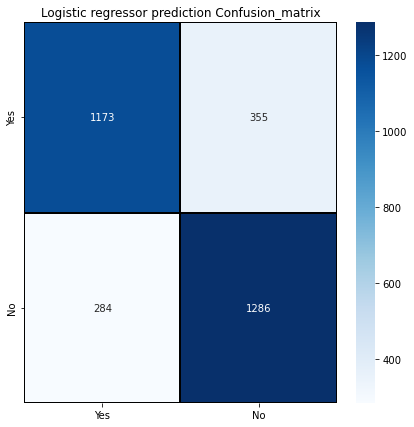

In [131]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Logistic regressor prediction Confusion_matrix")




## Classification Algorithms

### Random Forest Classifier


In [132]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))



accuracy_score:  0.84151065203357
confusion_matrix: 
 [[1269  259]
 [ 232 1338]]
classification_report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1528
           1       0.84      0.85      0.84      1570

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



### Observations :
Here we are getting 84% accuracy using Random Forest Classifier.


### Confusion Matrix for Random Forest Classifier.


Text(0.5, 1.0, 'RFC prediction Confusion_matrix')

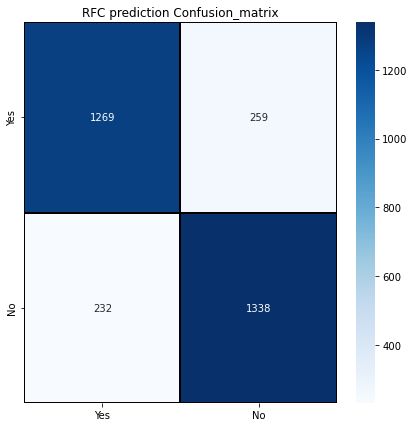

In [133]:
cm = confusion_matrix(y_test,pred_rfc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("RFC prediction Confusion_matrix")

In [134]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))



accuracy_score:  0.8034215622982569
confusion_matrix: 
 [[1213  315]
 [ 294 1276]]
classification_report: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1528
           1       0.80      0.81      0.81      1570

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098



### Observations :

Here we are getting 79% accuracy using Decision Tree Classifier

## Confusion Matrix for Decision Tree Classifier

Text(0.5, 1.0, 'DTC prediction Confusion_matrix')

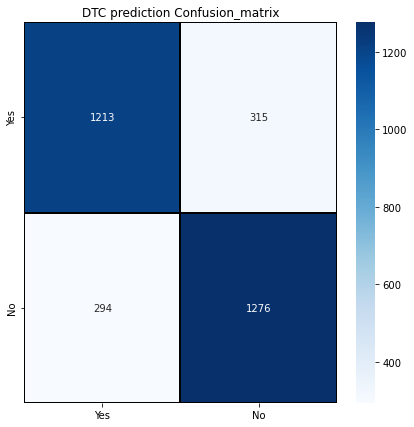

In [135]:
cm = confusion_matrix(y_test,pred_dtc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("DTC prediction Confusion_matrix")

##  Support Vector Machine Classifier

In [136]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))


accuracy_score:  0.7947062621045836
confusion_matrix: 
 [[1133  395]
 [ 241 1329]]
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.74      0.78      1528
           1       0.77      0.85      0.81      1570

    accuracy                           0.79      3098
   macro avg       0.80      0.79      0.79      3098
weighted avg       0.80      0.79      0.79      3098



### Observations :
Here we are getting 78% accuracy using Support Vector Machine Classifier

### Confusion Matrix for Support Vector Machine Classifier


Text(0.5, 1.0, 'SVC prediction Confusion_matrix')

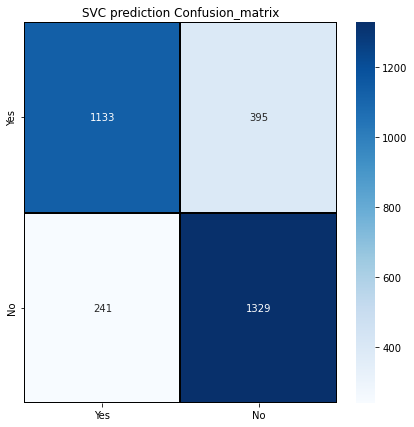

In [137]:
cm = confusion_matrix(y_test,pred_svc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("SVC prediction Confusion_matrix")

## KNN Classifier

In [138]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))


accuracy_score:  0.7940606843124597
confusion_matrix: 
 [[1118  410]
 [ 228 1342]]
classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.73      0.78      1528
           1       0.77      0.85      0.81      1570

    accuracy                           0.79      3098
   macro avg       0.80      0.79      0.79      3098
weighted avg       0.80      0.79      0.79      3098



### Observations :



Here we are getting 79% accuracy using KNN

## Confusion Matrix for KNN

Text(0.5, 1.0, 'KNN prediction Confusion_matrix')

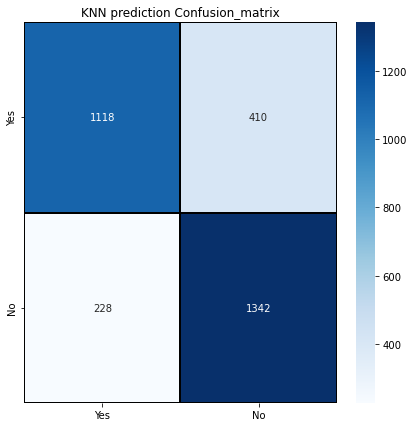

In [139]:
cm = confusion_matrix(y_test,pred_knn)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("KNN prediction Confusion_matrix")

## Gradient Boosting Classifier

In [140]:
gb = GradientBoostingClassifier(n_estimators =100,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_gb))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_gb))
print("classification_report: \n",classification_report(y_test,pred_gb))



accuracy_score:  0.8379599741768883
confusion_matrix: 
 [[1234  294]
 [ 208 1362]]
classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1528
           1       0.82      0.87      0.84      1570

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



### Observations :



Here we are getting 83% accuracy using Gradient Boosting classifier.
## Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Gradient Boosting classifier prediction Confusion_matrix')

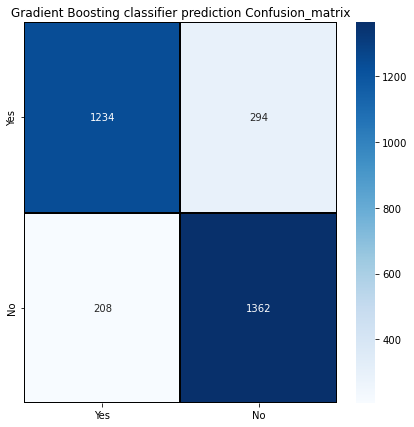

In [141]:
cm = confusion_matrix(y_test,pred_gb)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Gradient Boosting classifier prediction Confusion_matrix")

## XGB Classifier

In [142]:
XGBC= XGBClassifier()
XGBC.fit(x_train,y_train)
pred_XGBC = XGBC.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_XGBC))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_XGBC))
print("classification_report: \n",classification_report(y_test,pred_XGBC))


accuracy_score:  0.8405422853453841
confusion_matrix: 
 [[1260  268]
 [ 226 1344]]
classification_report: 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1528
           1       0.83      0.86      0.84      1570

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



### Observations :
Here we are getting 84% accuracy using XGB Classifier
## Confusion Matrix for XGB Classifier


Text(0.5, 1.0, 'XGB Classifier prediction Confusion_matrix')

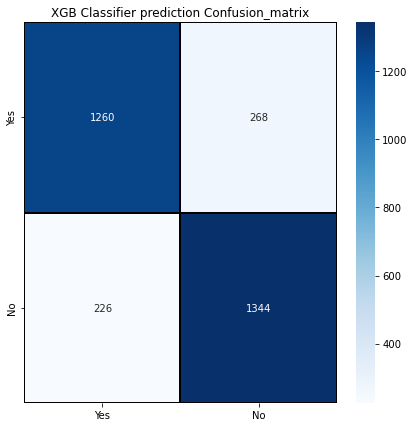

In [143]:
cm = confusion_matrix(y_test,pred_XGBC)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("XGB Classifier prediction Confusion_matrix")

## Cross Validation Score for all the model

In [144]:
#CV Score for Logistic Regression
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

#CV Score for Random Forest Classifier
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

#CV Score for Decision Tree Classifier
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

#CV Score for Support Vector Classifier
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

#CV Score for KNN Classifier
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

#CV Score for Gradient Boosting Classifier
print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=5).mean())

#CV Score for XGB Classifier
print('CV score for XGB Classifier: ',cross_val_score(XGBC,x,y,cv=5).mean())



CV score for Logistic Regression:  0.7856896741665474
CV score for Random forest Classifier:  0.8398285161111879
CV score for Decision Tree Classifier:  0.7910198790987016
CV score for Support Vector  Classifier:  0.7808465434839169
CV score for KNN Classifier:  0.7736825204100051
CV score for Gradient Boosting Classifier:  0.8190075217577804
CV score for XGB Classifier:  0.8335354605523768


### Observations :


From the observation of accuracy and cross validation score and their difference we can predict that XGB Classifier is the best model.
## ROC & AUC Curve for all model

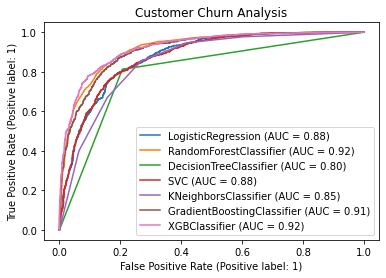

In [145]:
#Lets plot roc curve and check auc and performance of all algorithms
disp = plot_roc_curve(lr, x_test, y_test)
plot_roc_curve(rfc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(XGBC, x_test, y_test, ax = disp.ax_)
plt.title("Customer Churn Analysis")
plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()


## Hyper parameter tuning for best model using GridsearchCV
### The XGB Classifier with GridsearchCV## 

In [150]:
from sklearn.model_selection import KFold

In [151]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

In [152]:
CV_XGB = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')



In [153]:


CV_XGB.fit(x_train, y_train)



GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constra...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.2, 0.5, 1],
                         'booster': ['gbtree', 'gblinear'],
                         'gamma': [0, 0.5, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500],
                         'reg_alpha': [0, 0.5, 1], 'reg_lambda': [0.5, 1, 5]},
             scoring='roc_auc')

In [154]:
CV_XGB.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0.5,
 'learning_rate': 0.1,
 'n_estimators': 200,
 'reg_alpha': 0.5,
 'reg_lambda': 0.5}

In [155]:


CV_XGB.best_estimator_



XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.5, reg_lambda=0.5, ...)

In [156]:
Customer_Churn = XGBClassifier(base_score=0.2, booster='gbtree', gamma= 0.5, learning_rate= 0.1, n_estimators= 500, reg_alpha=1, reg_lambda=0.5)


In [157]:
Customer_Churn.fit(x_train, y_train)

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=0.5, ...)

In [158]:


pred = Customer_Churn.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred))
print("confusion_matrix: \n",confusion_matrix(y_test,pred))
print("classification_report: \n",classification_report(y_test,pred))



accuracy score:  0.8398967075532602
confusion_matrix: 
 [[1261  267]
 [ 229 1341]]
classification_report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1528
           1       0.83      0.85      0.84      1570

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



Text(0.5, 1.0, 'Confus')

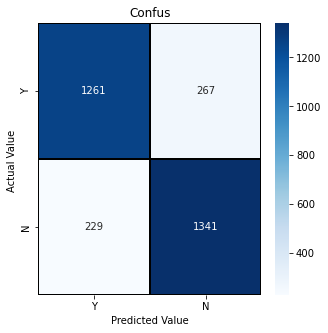

In [161]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value ")
plt.title('Confus')

### Observations :


Here the final model gives 84% accuracy after tuning.
## ROC-AUC Curve

In [162]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)

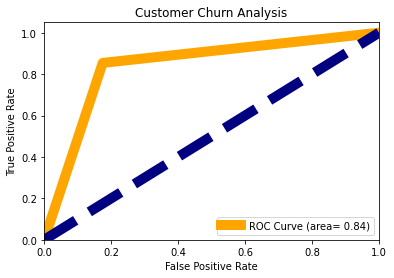

In [163]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Customer Churn Analysis")
plt.legend(loc="lower right")
plt.show()

### Conclusion :
- This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.84.
## Saving the Model

In [164]:
import pickle
filename='Customer_Churn_Analysis.pickle'
pickle.dump(CV_XGB,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
mport pickle.
file_name='my_file.pkl'
f = open(file_name,'wb')
pickle. dump(my_data,f)
f. close()

### Checking predicted and original values

In [165]:
a =np.array(y_test)
predicted=np.array(loaded_model.predict(x_test))
Customer_Churn_Analysis=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Customer_Churn_Analysis

,Orginal,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
3093,0,0
3094,0,0
3095,1,0
3096,0,0


In [166]:
model =Customer_Churn_Analysis.to_csv('Customer_Churn_Analysis.csv')
model

#### Model Prediction saved in CSV format